# Pressure Scan

Scan the pressure in Argon to see the effect on the emittance increase

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

#colorCycle = plt.rcParams['axes.prop_cycle']
plt.rcParams['figure.max_open_warning'] = 100

In [3]:
import miniScatterDriver

Welcome to JupyROOT 6.12/06


In [4]:
#Basic parameters
N = 1000000
QUICKMODE = True

PHYS      = "QGSP_BERT__SS"
BEAM = "e-"

THICK = 15 #Target thickness [mm]
GAS = "Ar"

ENERGY = 215.0 #[MeV]
ALPHA = 0.0
EPS = 3.0 #[um]
BETA = 1.4 #[m]
ZOFFSET = -THICK
ZOFFSET_BACKTRACK=True

#Some derived quantities
gamma_rel = ENERGY/0.511 #assume electron beam!
beta_rel  = np.sqrt(gamma_rel**2 - 1.0) / gamma_rel;
print(gamma_rel, beta_rel)

420.7436399217221 0.9999971755395483


In [5]:
# Scan the pressure
def ScanPressure(pressures):
    quiet = True #Chattiness?
    
    covar = (EPS,BETA,ALPHA)
    
    #Output arrays
    eps_x  = np.zeros_like(pressures)
    eps_y  = np.zeros_like(pressures)
    
    beta_x  = np.zeros_like(pressures)
    beta_y  = np.zeros_like(pressures)
    
    alpha_x = np.zeros_like(pressures)
    alpha_y = np.zeros_like(pressures)
    
    sigma_x = np.zeros_like(pressures)
    sigma_y = np.zeros_like(pressures)
    
    #Run the scan!
    i=0
    for p in pressures:
        print ("pressure = {0} ({1}/{2})".format(p,i+1,len(pressures)), end='\r')
        mat = GAS+"::"+str(p)
        miniScatterDriver.runScatter(N=N, PHYS=PHYS, QUICKMODE=QUICKMODE,\
                                     BEAM=BEAM, COVAR=covar,\
                                     ZOFFSET=ZOFFSET, ZOFFSET_BACKTRACK=ZOFFSET_BACKTRACK,\
                                     THICK=THICK, MAT=mat, quiet=True)
        
        emittances = miniScatterDriver.getData(quiet=True)

        eps_x[i]   = emittances[0]
        beta_x[i]  = emittances[1]
        alpha_x[i] = emittances[2]
        sigma_x[i] = np.sqrt(eps_x[i]*beta_x[i]*1e6/(gamma_rel*beta_rel))

        eps_y[i]   = emittances[3]
        beta_y[i]  = emittances[4]
        alpha_y[i] = emittances[5]
        sigma_y[i] = np.sqrt(eps_y[i]*beta_y[i]*1e6/(gamma_rel*beta_rel))
        
        i = i+1

    return (eps_x,eps_y, beta_x,beta_y, alpha_x,alpha_y, sigma_x,sigma_y)

In [7]:
press = np.logspace(np.log10(0.5),np.log10(50), 15) #[mbar]
print("press =", press, "[mbar]")

(eps_x,eps_y, beta_x,beta_y, alpha_x,alpha_y, sigma_x,sigma_y) = ScanPressure(press)

press = [ 0.5         0.69474775  0.96534886  1.3413479   1.86379686  2.58973734
  3.59842837  5.          6.94747747  9.65348864 13.41347898 18.6379686
 25.8973734  35.98428365 50.        ] [mbar]


<IPython.core.display.Javascript object>


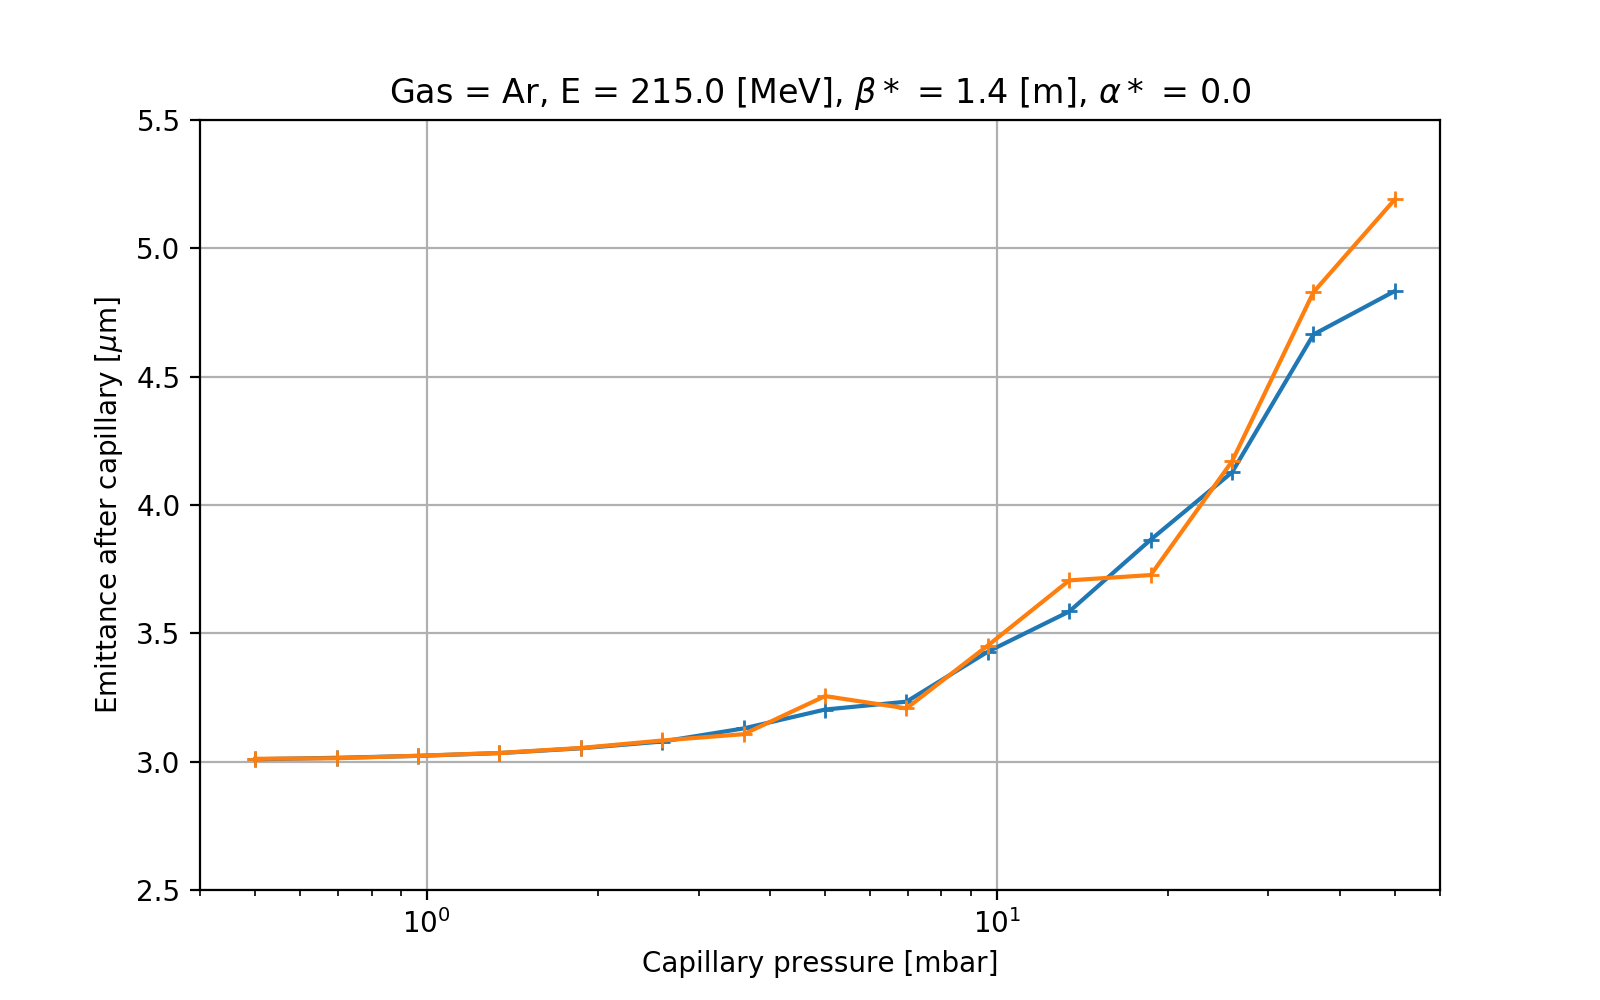

In [17]:
plt.figure(1)

plt.semilogx(press, eps_x, '+-')
plt.semilogx(press, eps_y, '+-')
plt.xlabel("Capillary pressure [mbar]")
plt.ylabel("Emittance after capillary [$\mu$m]")
plt.title(r"Gas = {0}, E = {1} [MeV], $\beta*$ = {2} [m], $\alpha*$ = {3}".format(GAS, ENERGY, BETA, ALPHA))

plt.ylim(2.5,5.5)
plt.xlim(0.4,60)
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


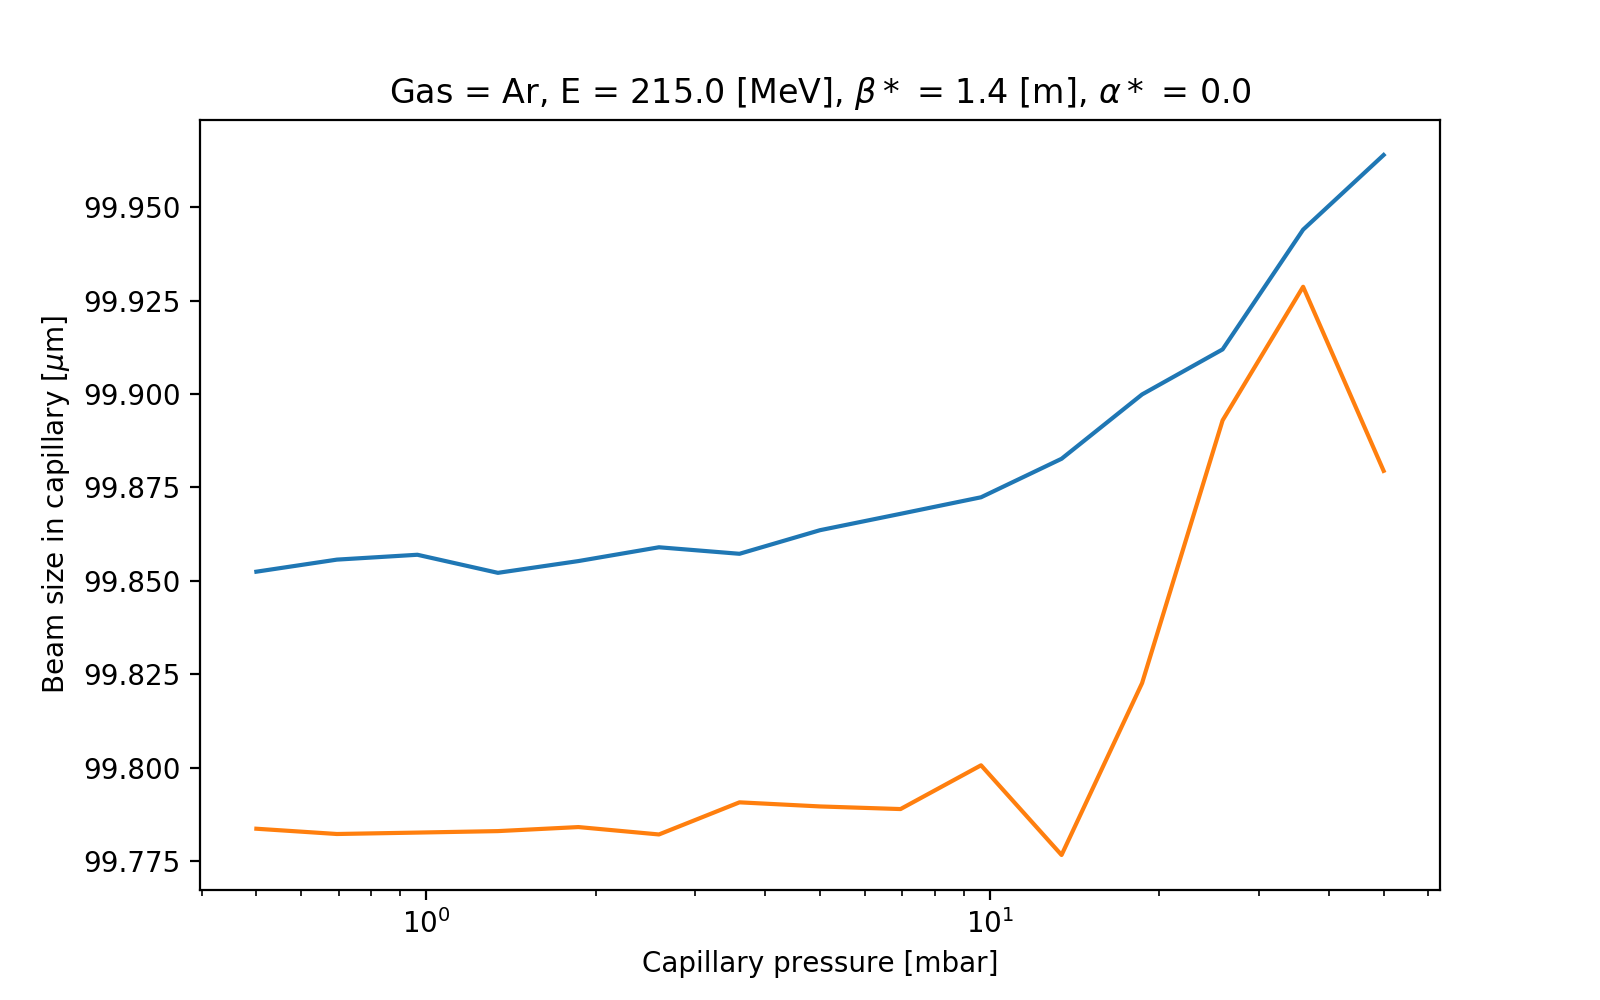

In [11]:
plt.figure(2)
plt.semilogx(press, sigma_x)
plt.semilogx(press, sigma_y)
plt.xlabel("Capillary pressure [mbar]")
plt.ylabel("Beam size in capillary [$\mu$m]")
plt.title(r"Gas = {0}, E = {1} [MeV], $\beta*$ = {2} [m], $\alpha*$ = {3}".format(GAS, ENERGY, BETA, ALPHA))

#plt.ylim(3,5)

plt.show()

<IPython.core.display.Javascript object>


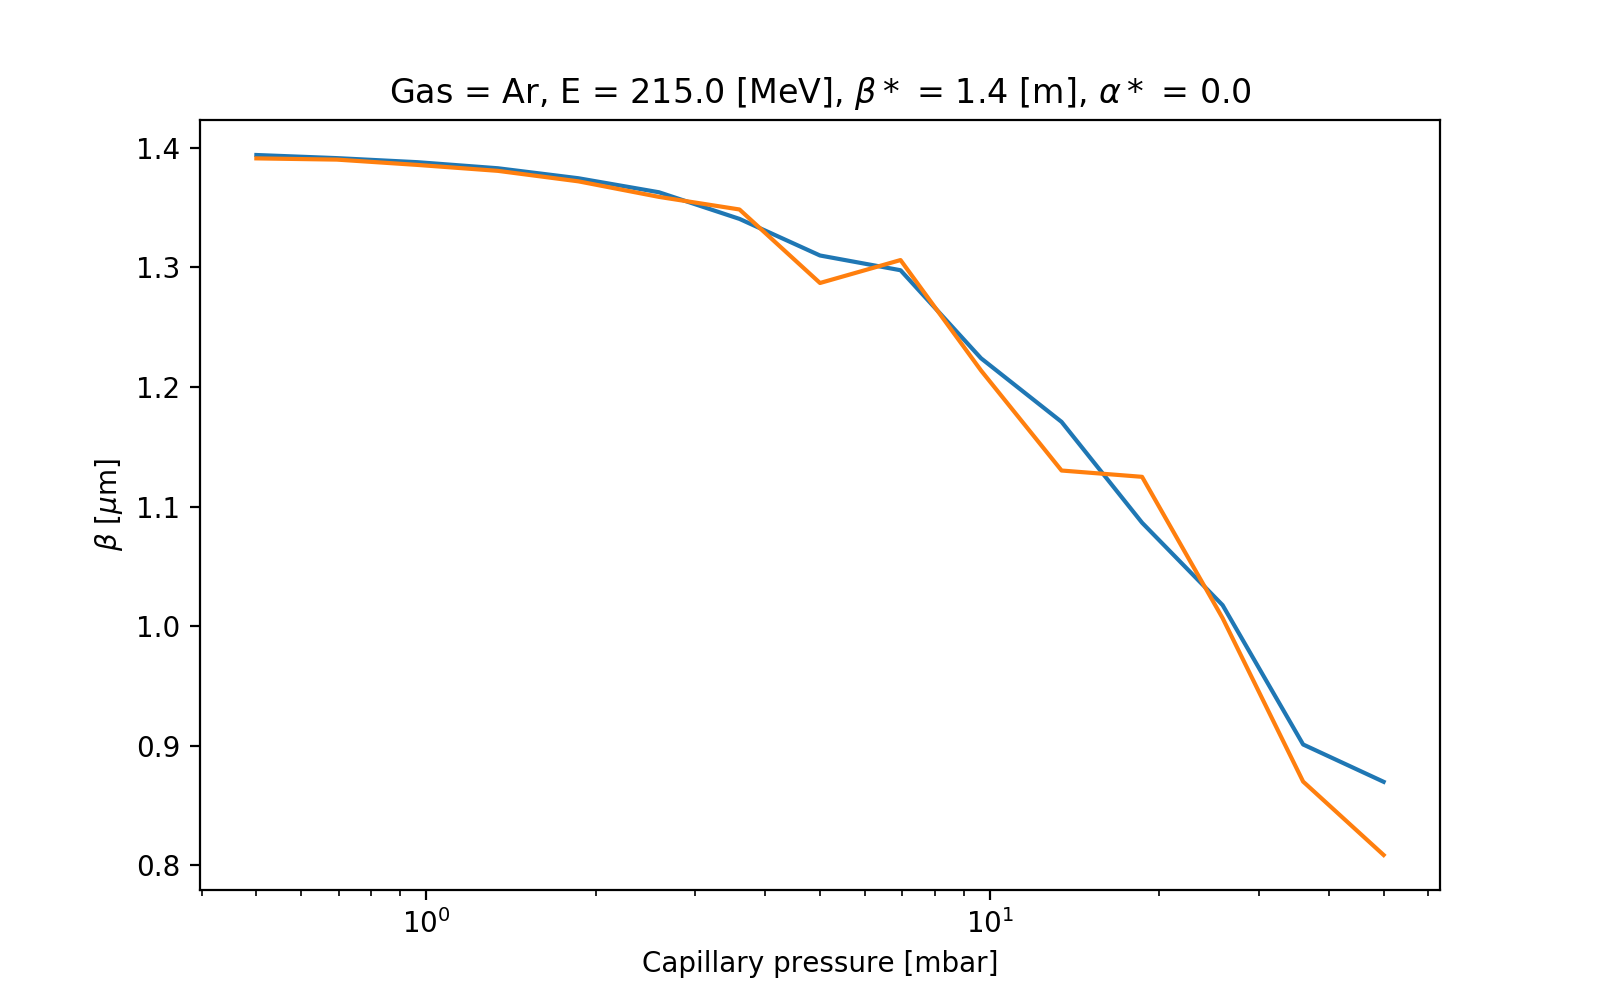

In [12]:
plt.figure(3)
plt.semilogx(press, beta_x)
plt.semilogx(press, beta_y)
plt.xlabel("Capillary pressure [mbar]")
plt.ylabel(r"$\beta$ [$\mu$m]")
plt.title(r"Gas = {0}, E = {1} [MeV], $\beta*$ = {2} [m], $\alpha*$ = {3}".format(GAS, ENERGY, BETA, ALPHA))

#plt.ylim(3,5)

plt.show()